<a href="https://colab.research.google.com/github/NehaNeha417/loan_prediction/blob/master/loan_prediction_again.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [442]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [443]:
data=pd.read_csv('/content/loan_predction.csv')

In [444]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [445]:
data.shape

(614, 13)

In [446]:
data.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [447]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [448]:
data.Gender = data.Gender.fillna(data.Gender.ffill())
data.Dependents = data.Dependents.fillna(data.Dependents.ffill())
data.Self_Employed = data.Self_Employed.fillna(data.Self_Employed.ffill())
data.Credit_History = data.Credit_History.fillna(data.Credit_History.ffill())


In [449]:
data.LoanAmount.fillna(data.LoanAmount.mean(),inplace=True)
data.Loan_Amount_Term.fillna(data.Loan_Amount_Term.mean(),inplace=True)


In [450]:
data=data.dropna()

In [451]:
data.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [452]:
data.shape

(611, 13)

In [453]:
print(data.Self_Employed.value_counts())
print(data.Dependents.value_counts())
print(data.Property_Area.value_counts())
print(data.Education.value_counts())
print(data.Gender.value_counts())
print(data.Loan_Status.value_counts())
print(data.Married.value_counts())



No     525
Yes     86
Name: Self_Employed, dtype: int64
0     352
1     104
2     104
3+     51
Name: Dependents, dtype: int64
Semiurban    231
Urban        201
Rural        179
Name: Property_Area, dtype: int64
Graduate        477
Not Graduate    134
Name: Education, dtype: int64
Male      498
Female    113
Name: Gender, dtype: int64
Y    419
N    192
Name: Loan_Status, dtype: int64
Yes    398
No     213
Name: Married, dtype: int64


In [454]:
data.Loan_Status=pd.get_dummies(data.Loan_Status)
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,0


<Figure size 720x720 with 0 Axes>

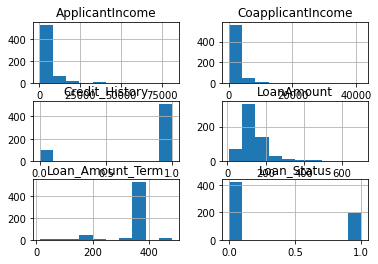

In [455]:
plt.figure(figsize=(10,10))
data.hist()
plt.show()

In [456]:
data = data.drop(columns=['Married','Education','Self_Employed'])

In [457]:
data = pd.get_dummies(data,columns=['Gender'])
data = pd.get_dummies(data,columns=['Property_Area'])
data = pd.get_dummies(data,columns=['Dependents'])
#data = pd.get_dummies(data,columns=['Married'])

In [458]:
data.shape

(611, 16)

<Figure size 2160x2160 with 0 Axes>

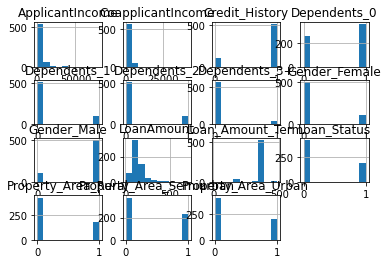

In [459]:
plt.figure(figsize=(30,30))
data.hist()
plt.show()

In [460]:
print(data.columns)

Index(['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Female',
       'Gender_Male', 'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+'],
      dtype='object')


In [461]:
data.shape

(611, 16)

In [462]:
from sklearn.model_selection import train_test_split
x = data.drop(['Loan_Status','Loan_ID'],axis=1)
y = data['Loan_Status']
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42, shuffle=True)

In [463]:
x_train.shape

(488, 14)

In [464]:
x_train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents_0,Dependents_1,Dependents_2,Dependents_3+
564,8799,0.0,258.0,360.0,0.0,0,1,0,0,1,0,0,1,0
289,9508,0.0,187.0,360.0,1.0,0,1,1,0,0,1,0,0,0
324,15000,0.0,300.0,360.0,1.0,0,1,1,0,0,0,0,0,1
133,3459,0.0,25.0,120.0,1.0,0,1,0,1,0,1,0,0,0
175,3497,1964.0,116.0,360.0,1.0,0,1,1,0,0,1,0,0,0


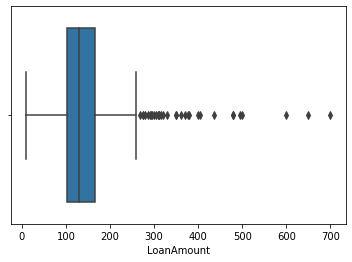

In [465]:
sns.boxplot(x_train['LoanAmount'])

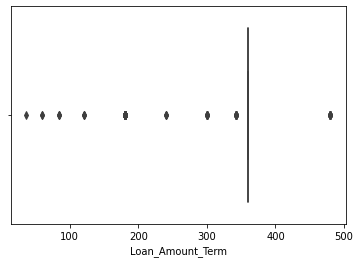

In [466]:
sns.boxplot(x_train['Loan_Amount_Term'])

In [467]:
x_train.Loan_Amount_Term.describe()

count    488.000000
mean     342.565574
std       63.618794
min       36.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

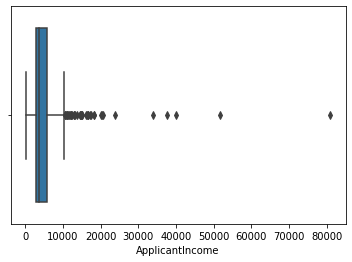

In [468]:
sns.boxplot(x_train['ApplicantIncome'])

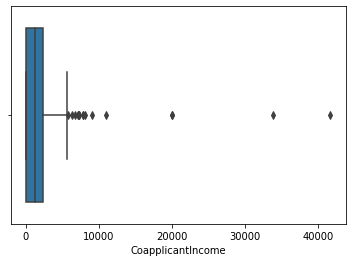

In [469]:
sns.boxplot(x_train['CoapplicantIncome'])

In [470]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression


In [471]:
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.metrics import classification_report,roc_auc_score,roc_curve

Accuracy_score= 0.8130081300813008
[[82  6]
 [17 18]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        88
           1       0.75      0.51      0.61        35

    accuracy                           0.81       123
   macro avg       0.79      0.72      0.74       123
weighted avg       0.81      0.81      0.80       123

0.7681818181818181


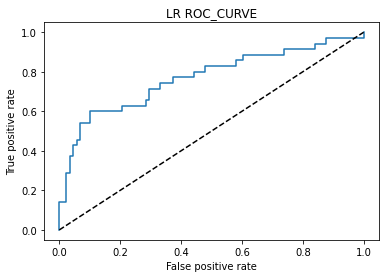

In [472]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
y_proba = lr.predict_proba(x_test)
y_proba = y_proba[:,1]
fper,tper,threshold = roc_curve(y_test,y_proba)
acc = accuracy_score(y_test,y_pred)
print('Accuracy_score=',acc)
print('='*40)
print(confusion_matrix(y_test,y_pred))
print('='*40)
print(classification_report(y_test,y_pred))
print('='*40)
print(roc_auc_score(y_test,y_proba))
plt.plot(fper,tper)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LR ROC_CURVE')
plt.show()

In [473]:
# i =[0.0001,0.001,0.01,0.1,10]
# test_score = []
# for c in i:
#   clf = svm.SVC(C=c) #,gamma=0.1)
#   clf.fit(x_train,y_train)
#   y_pred=clf.predict(x_test)
#   acc = accuracy_score(y_test,y_pred)
#   test_score.append(acc)
# print(test_score)
  


In [474]:
# clf=svm.SVC(C=0.1)          #gamma=0.1)
# clf.fit(x_train,y_train)
# y_pred=clf.predict(x_test)
# acc = accuracy_score(y_test,y_pred)
# print(acc)
# print('='*40)
# print(confusion_matrix(y_test,y_pred))
# print('='*40)
# print(classification_report(y_test,y_pred))
# print('='*40)
# print(roc_auc_score(y_test,y_proba))
# plt.plot(fper,tper)
# plt.plot([0,1],[0,1],'k--')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('LR ROC_CURVE')
# plt.show()


In [475]:
# ran = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=5,max_features=2)
# ran.fit(x_train,y_train)
# y_pred= ran.predict(x_test)
# acc = accuracy_score(y_test,y_pred)
# print(acc)
# print('='*40)
# print(confusion_matrix(y_test,y_pred))
# print('='*40)
# print(classification_report(y_test,y_pred))
# print('='*40)
# print(roc_auc_score(y_test,y_proba))
# plt.plot(fper,tper)
# plt.plot([0,1],[0,1],'k--')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('Random_Forest ROC_CURVE')
# plt.show()


In [476]:
# from sklearn.ensemble import VotingClassifier
# from sklearn.neighbors import KNeighborsClassifier
# #VC = VotingClassifier()
# lr = LogisticRegression(max_iter=50,random_state=42)
# knn = KNeighborsClassifier()
# dt = DecisionTreeClassifier(max_depth=5,max_features=2,random_state=42)
# Classifiers = [('Logistic Regression',lr),('K Nearest Neighbour',knn),('Decision Tree',dt)]
# for clf_name,clf in Classifiers:
#   clf.fit(x_train,y_train)
#   y_pred=clf.predict(x_test)
#   acc = accuracy_score(y_test,y_pred)
#   print(acc)
#   #print(':s',':.3f'.format(clf_name,accuracy_score(y_test,y_pred)))

In [477]:
# VC = VotingClassifier(estimators=Classifiers)
# VC.fit(x_train,y_train)
# y_pred = VC.predict(x_test)
# acc = accuracy_score(y_test,y_pred)
# print(acc)
# print('='*40)
# print(confusion_matrix(y_test,y_pred))
# print('='*40)
# print(classification_report(y_test,y_pred))
# print('='*40)
# print(roc_auc_score(y_test,y_proba))
# plt.plot(fper,tper)
# plt.plot([0,1],[0,1],'k--')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('Random_Forest ROC_CURVE')
# plt.show()


In [478]:
import xgboost as xgb
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
#xgb_clf= xgb.XGBClassifier(learning_rate=0.01)
#clf = AdaBoostClassifier(RandomForestClassifier(n_estimators = 15, max_depth = 3),n_estimators=15, random_state=47)

# clf = GaussianNB()
# clf.fit(x_train,y_train)
# y_pred= ran.predict(x_test)
# acc = accuracy_score(y_test,y_pred)
# print(acc)
# print('='*40)
# print(confusion_matrix(y_test,y_pred))
# print('='*40)
# print(classification_report(y_test,y_pred))
# print('='*40)
# print(roc_auc_score(y_test,y_proba))
# plt.plot(fper,tper)
# plt.plot([0,1],[0,1],'k--')
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('Random_Forest ROC_CURVE')
# plt.show()
